# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Dataset tentang kedepresian siswa, berasal dari Kaggle dengan link berikut.
https://www.kaggle.com/datasets/hopesb/student-depression-dataset

Dataset berikut memiliki kolom seperti berikut

ID: Unique identifier untuk tiap murid.

Age: Murid siswa.

Gender: Gender (cth: Male, Female).

City: Lokasi siswa.

CGPA: Rata rata nilai akademis.

Sleep Duration: Rata rata durasi tidur.

Profession: Pekerjaan murid.

Work Pressure: Adanya tekanan dalam bekerja.

Academic Pressure: Skala tekanan dalam ranah akademik.

Study Satisfaction: Skala siswa menikmati belajar.

Job Satisfaction: Skala siswa menikmati pekerjaan.

Dietary Habits: Bagaimana pola makan siswa.

Degree : Tingkat pendidikan yang sedang ditempuh.

Have you ever had suicidal thoughts ? : (SENSITIF) Apakah siswa pernah memikirkan tentang meninggalkan dunia.

Work/Study Hours : Durasi bekerja atau belajar.

Financial Stress : Skala siswa mengalami kesulitan dalam finansial.

Family History of Mental Illness : Apakah ada keluarga / famili yang punya penyakit mental.

Aslinya, dataset ini punya label, tapi saya drop labelnya sebelum digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
data = pd.read_csv('student_depression.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Cek 5 data teratas

In [3]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No


Menjelaskan semua dataset secara statistikal

In [4]:
data.describe(include='all')

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27898.000000,27901
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,NaN,2
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,Yes,NaN,NaN,No
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,NaN,14398
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,3.139867,NaN
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,1.437347,NaN
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,2.000000,NaN
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,3.000000,NaN
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN


Menjelaskan tipe data dan jumlah data yang terisi dalam data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Melihat berapa banyak kolom dan baris yang ada dalam dataset, yaitu 27901 baris dan 17 kolom / fitur.

In [6]:
data.shape

(27901, 17)

Menjabarkan berapa banyak data yang kosong dalam dataset, ternyata Financial Stress ada value kosong.

In [7]:
data.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


List semua unique values dari tiap kolom.

In [8]:
for i in range(data.shape[1]):
    print(data.columns[i])
    print(data[data.columns[i]].unique())
    print()

id
[     2      8     26 ... 140689 140690 140699]

Gender
['Male' 'Female']

Age
[33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]

City
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']

Profession
['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']

Academic Pressure
[5. 2. 3. 4. 1. 0.]

Work Pressure


Melihat distribusi data untuk fitur yang bersifat numerik.

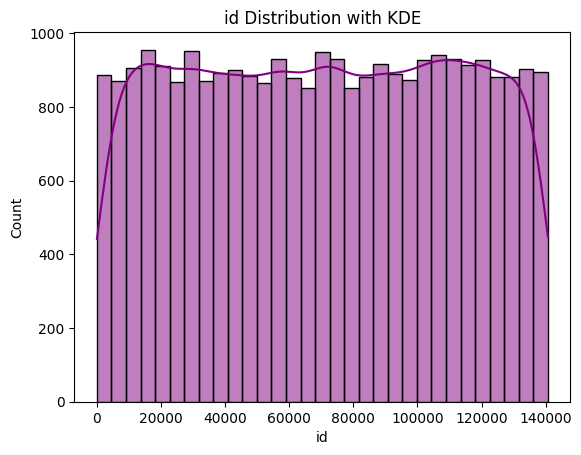

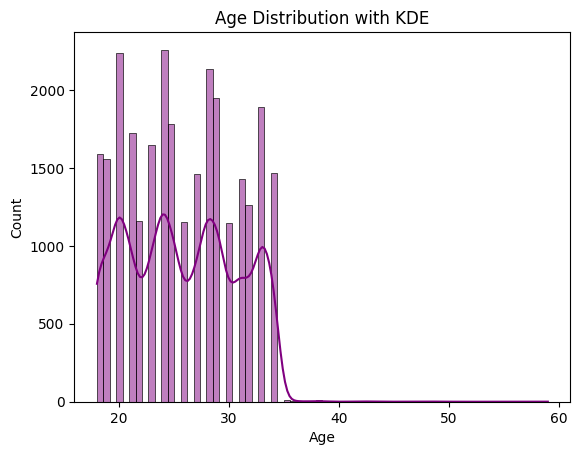

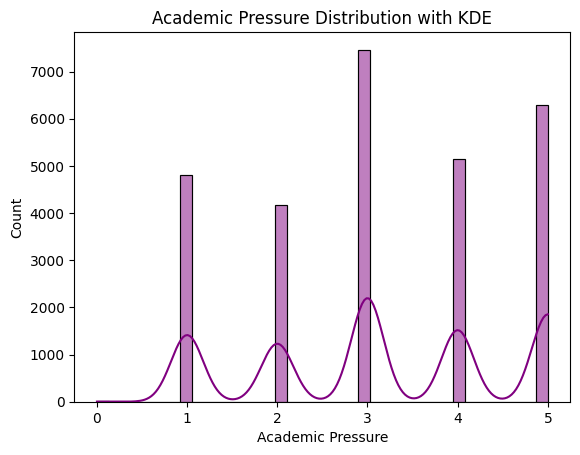

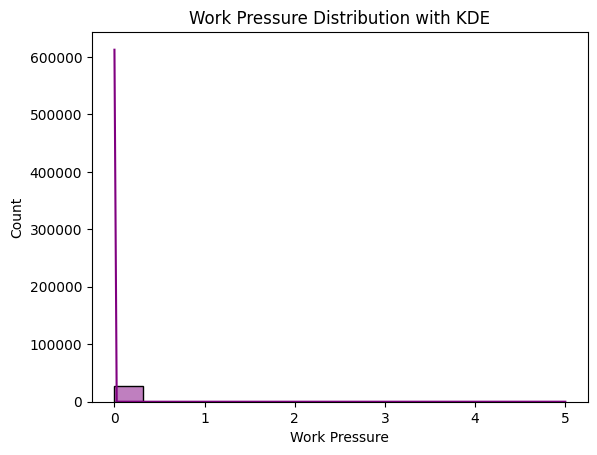

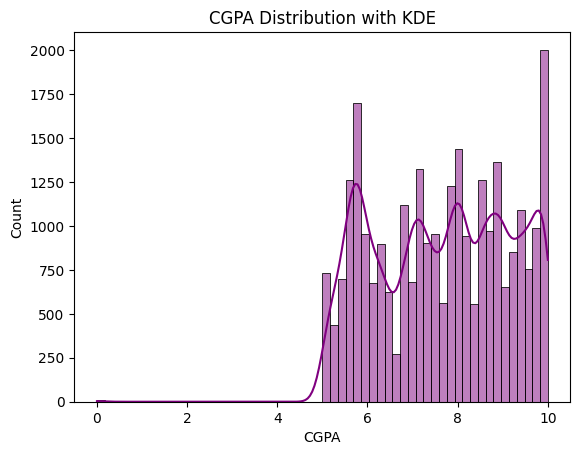

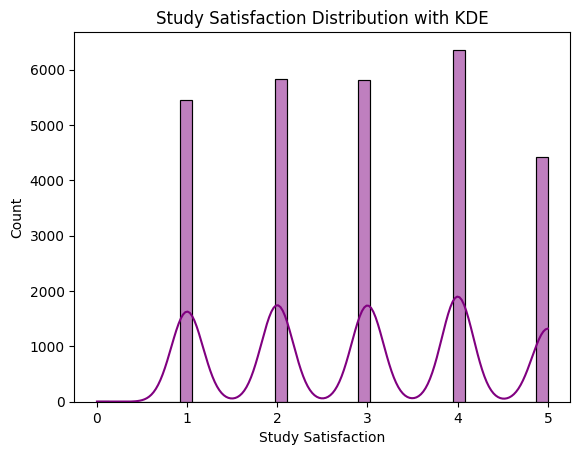

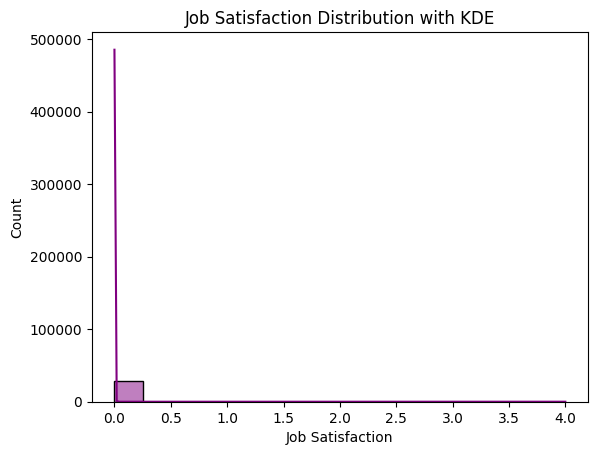

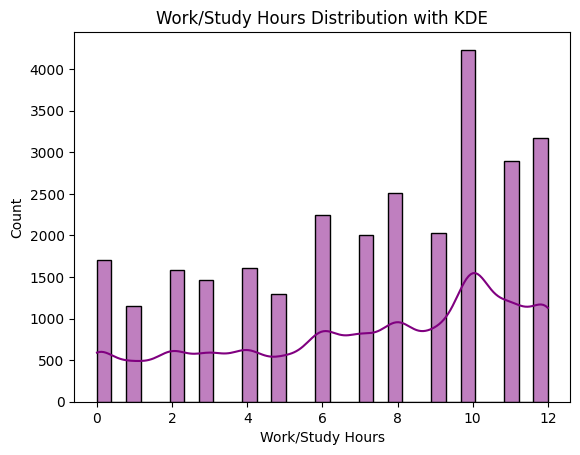

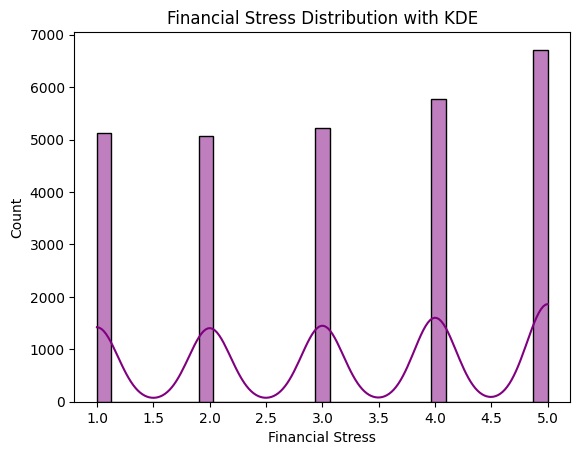

In [9]:
numerical_features = data.select_dtypes(include='number')

for i in range(numerical_features.shape[1]):
    sns.histplot(numerical_features[numerical_features.columns[i]], kde=True, color='purple')
    plt.title(f'{numerical_features.columns[i]} Distribution with KDE')
    plt.show()

Berikut adalah distribusi dari fitur kategorikal.

In [10]:
categorical_features = data.select_dtypes(include='object')
categorical_features

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,Male,Visakhapatnam,Student,5-6 hours,Healthy,B.Pharm,Yes,No
1,Female,Bangalore,Student,5-6 hours,Moderate,BSc,No,Yes
2,Male,Srinagar,Student,Less than 5 hours,Healthy,BA,No,Yes
3,Female,Varanasi,Student,7-8 hours,Moderate,BCA,Yes,Yes
4,Female,Jaipur,Student,5-6 hours,Moderate,M.Tech,Yes,No
...,...,...,...,...,...,...,...,...
27896,Female,Surat,Student,5-6 hours,Unhealthy,Class 12,Yes,Yes
27897,Male,Ludhiana,Student,Less than 5 hours,Healthy,MSc,No,Yes
27898,Male,Faridabad,Student,5-6 hours,Unhealthy,MD,No,No
27899,Female,Ludhiana,Student,Less than 5 hours,Healthy,Class 12,Yes,No


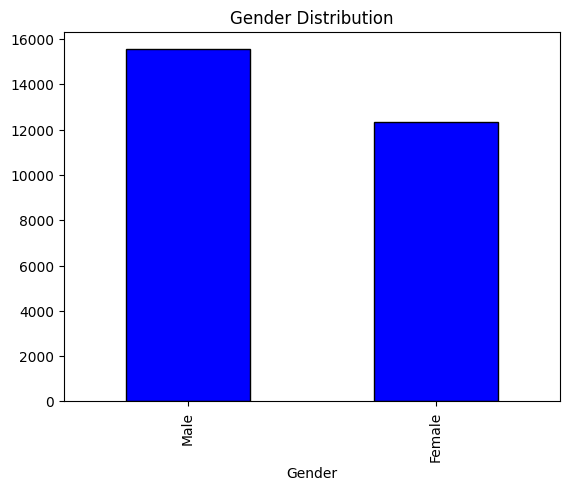

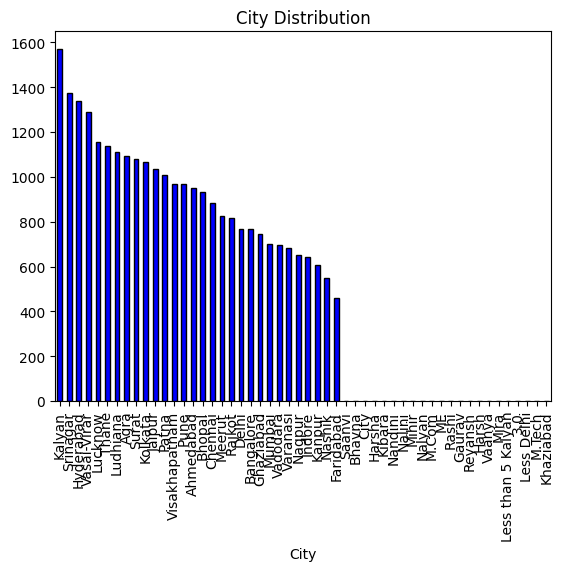

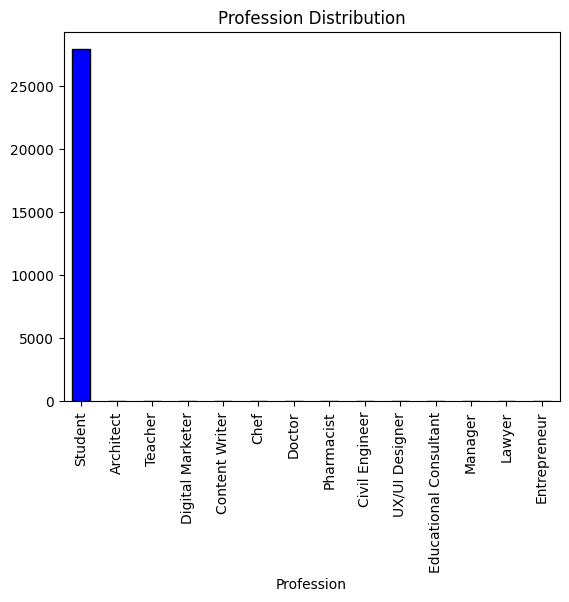

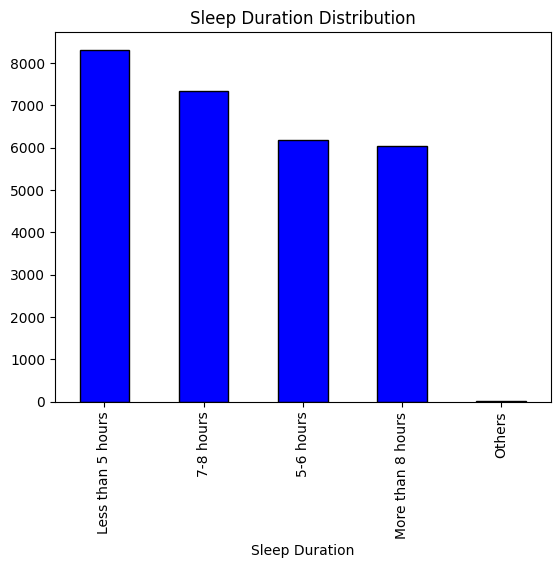

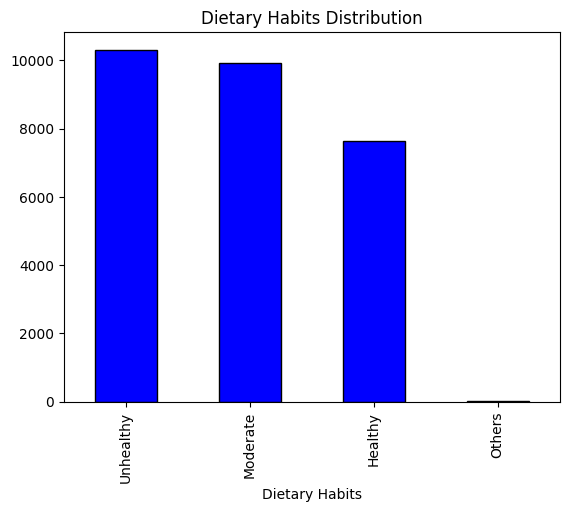

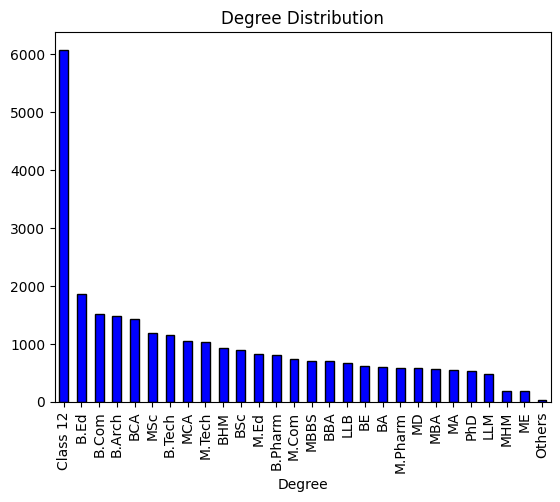

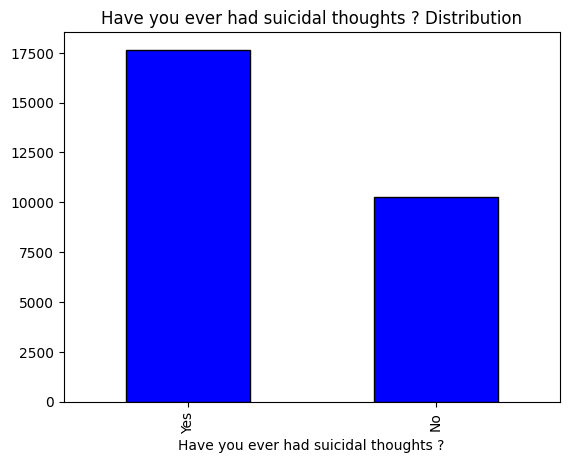

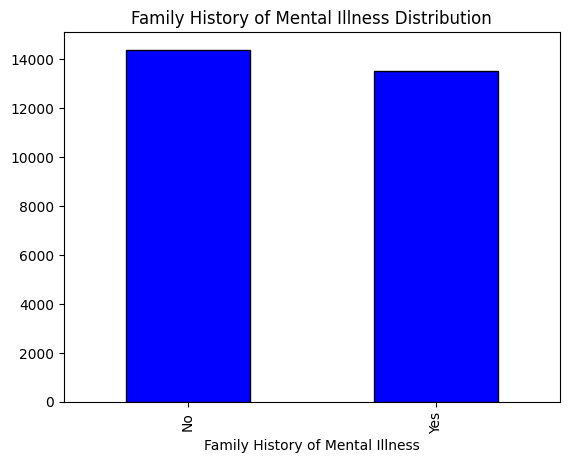

In [11]:
for i in range(categorical_features.shape[1]):
    tmp = categorical_features[categorical_features.columns[i]].value_counts()
    tmp.plot(kind='bar', color='blue', edgecolor='black')
    plt.title(f'{categorical_features.columns[i]} Distribution')
    plt.show()

Persebaran data masing-masing fitur, secara tertulis.

In [12]:
for i in range(data.shape[1]):
    print(data[data.columns[i]].value_counts())
    print()

id
2         1
94192     1
94236     1
94235     1
94234     1
         ..
46880     1
46877     1
46873     1
46872     1
140699    1
Name: count, Length: 27901, dtype: int64

Gender
Male      15547
Female    12354
Name: count, dtype: int64

Age
24.0    2258
20.0    2237
28.0    2133
29.0    1950
33.0    1893
25.0    1784
21.0    1726
23.0    1645
18.0    1587
19.0    1560
34.0    1468
27.0    1462
31.0    1427
32.0    1262
22.0    1160
26.0    1155
30.0    1145
35.0      10
38.0       8
36.0       7
42.0       4
48.0       3
39.0       3
43.0       2
46.0       2
37.0       2
49.0       1
51.0       1
44.0       1
59.0       1
54.0       1
58.0       1
56.0       1
41.0       1
Name: count, dtype: int64

City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur   

Korelasi antar fitur, hanya untuk numerikal.
Saya tidak konversikan gender dahulu karena masih di tahap EDA.

Setelah Preprocessing, saya akan menunjukkan kembali correlation heatmap.

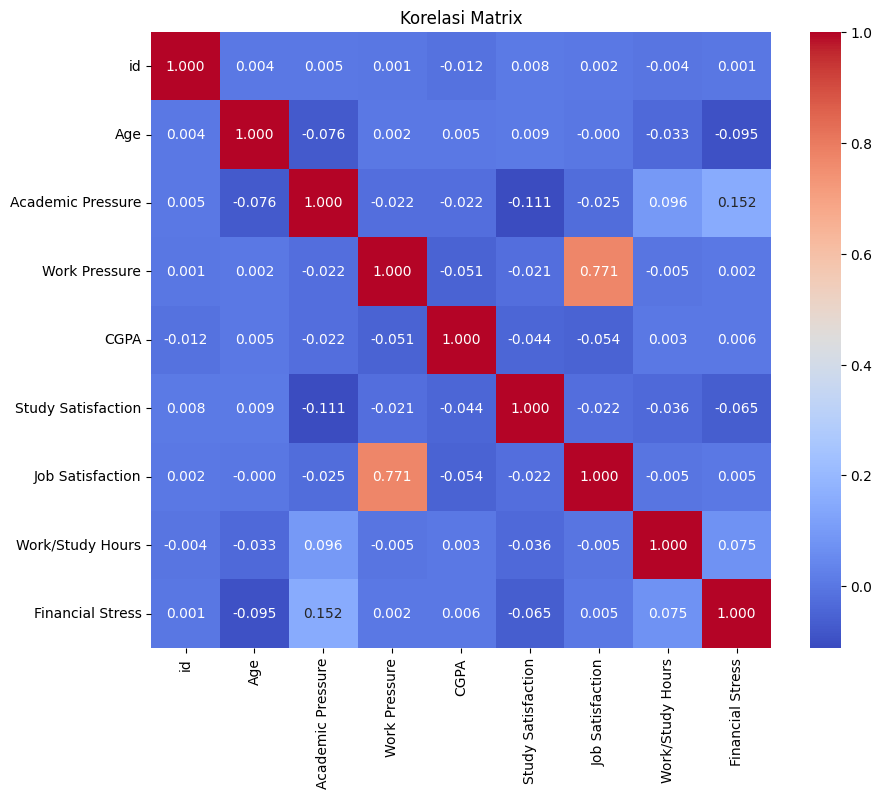

In [13]:
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', cbar=True)
plt.title('Korelasi Matrix')
plt.show()

Ada korelasi yang sangat baik, yaitu Job Satisfaction dan Work Pressure.

Cek persebaran data

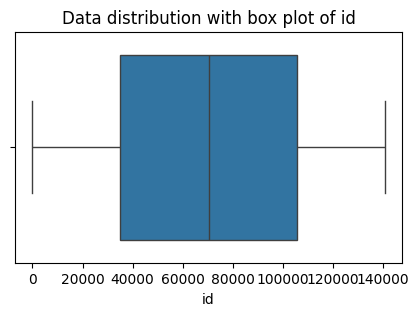

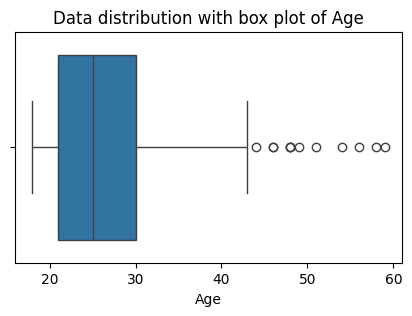

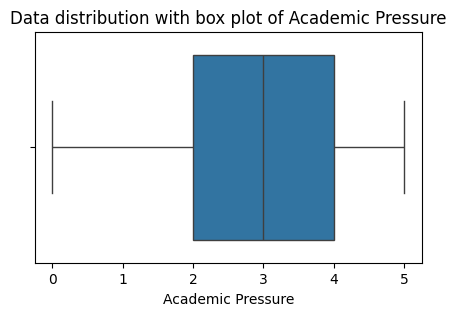

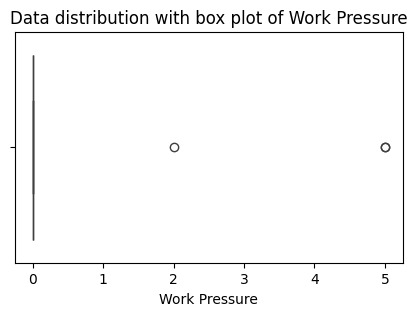

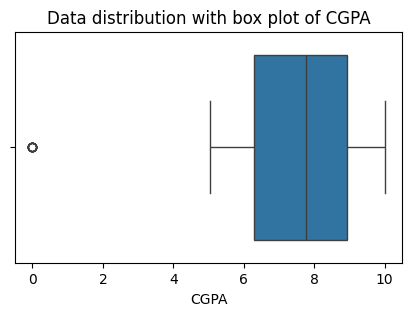

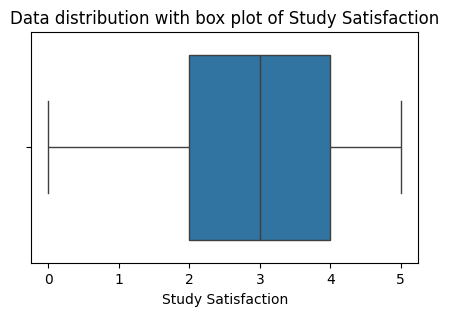

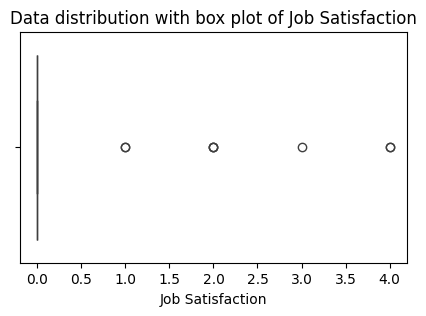

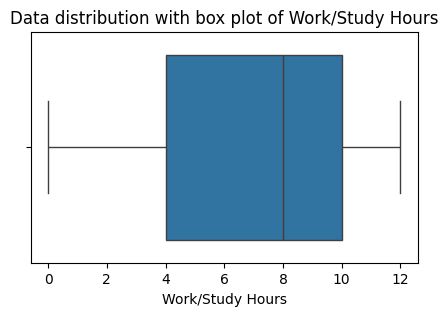

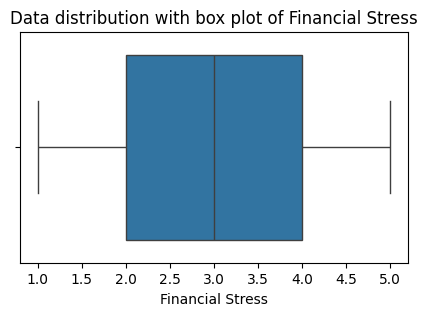

In [14]:
numerical_features = data.select_dtypes(include='number')

for i in numerical_features:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=numerical_features[i])
    plt.title(f'Data distribution with box plot of {i}')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Saya akan ikuti referensi.

Untuk missing values tidak ada, maka mari cek dan hapus data duplicate.

In [15]:
data.duplicated().sum()

0

Drop fitur id karena hanya berperan sebagai unique identifier dan tidak akan memberikan dampak apapun pada prediksi.

In [16]:
data = data.drop('id', axis=1)

Cek empty values dan isi empty values.

In [17]:
data.isnull().sum()

,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Sleep Duration,0


Mengisi data yang kosong dengan mean karena Financial Stress punya tipe data float, sehingga lebih cocok diisi dengan mean.

In [18]:
print(data['Financial Stress'].mean())

3.1398666571080365


In [19]:
data['Financial Stress'] = data['Financial Stress'].fillna(data['Financial Stress'].mean())

Saya akan encode fitur kategorikal terlebih dahulu dengan label encoding, agar fitur kategorikal berubah menjadi numerikal.

In [20]:


categorical_features = data.select_dtypes(include='object')

encoder = LabelEncoder()

for i in categorical_features.columns:
    data[i] = encoder.fit_transform(data[i])

data

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,33.0,51,11,5.0,0.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0
1,0,24.0,3,11,2.0,0.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1
2,1,31.0,44,11,3.0,0.0,7.03,5.0,0.0,2,0,5,0,9.0,1.0,1
3,0,28.0,49,11,3.0,0.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1
4,0,25.0,16,11,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,45,11,5.0,0.0,5.75,5.0,0.0,0,3,11,1,7.0,1.0,1
27897,1,27.0,25,11,2.0,0.0,9.40,3.0,0.0,2,0,25,0,0.0,3.0,1
27898,1,31.0,9,11,3.0,0.0,6.61,4.0,0.0,0,3,22,0,12.0,2.0,0
27899,0,18.0,25,11,5.0,0.0,6.88,2.0,0.0,2,0,11,1,10.0,5.0,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  int64  
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  int64  
 3   Profession                             27901 non-null  int64  
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  int64  
 10  Dietary Habits                         27901 non-null  int64  
 11  De

Normalisasi fitur.

In [22]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# pasang lagi data dengan datatype dataframe
data = pd.DataFrame(normalized_data, columns=data.columns)
data

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1.0,0.365854,1.000000,0.846154,1.0,0.0,0.897,0.4,0.0,0.00,0.000000,0.111111,1.0,0.250000,0.00,0.0
1,0.0,0.146341,0.058824,0.846154,0.4,0.0,0.590,1.0,0.0,0.00,0.333333,0.370370,0.0,0.250000,0.25,1.0
2,1.0,0.317073,0.862745,0.846154,0.6,0.0,0.703,1.0,0.0,0.50,0.000000,0.185185,0.0,0.750000,0.00,1.0
3,0.0,0.243902,0.960784,0.846154,0.6,0.0,0.559,0.4,0.0,0.25,0.333333,0.259259,1.0,0.333333,1.00,1.0
4,0.0,0.170732,0.313725,0.846154,0.8,0.0,0.813,0.6,0.0,0.00,0.333333,0.629630,1.0,0.083333,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.0,0.219512,0.882353,0.846154,1.0,0.0,0.575,1.0,0.0,0.00,1.000000,0.407407,1.0,0.583333,0.00,1.0
27897,1.0,0.219512,0.490196,0.846154,0.4,0.0,0.940,0.6,0.0,0.50,0.000000,0.925926,0.0,0.000000,0.50,1.0
27898,1.0,0.317073,0.176471,0.846154,0.6,0.0,0.661,0.8,0.0,0.00,1.000000,0.814815,0.0,1.000000,0.25,0.0
27899,0.0,0.000000,0.490196,0.846154,1.0,0.0,0.688,0.4,0.0,0.50,0.000000,0.407407,1.0,0.833333,1.00,0.0


Saya tidak membuang outlier karena pada percobaan sebelumnya, membuang outlier tidak berdampak apa apa pada hasil.

In [23]:
# numerical_features = data.select_dtypes(include='number')

# z_score = np.abs((numerical_features - numerical_features.mean()) / numerical_features.std())
# filtered_df = data[(z_score > -3) & (z_score < 3)]

# data = filtered_df

Cek lagi correlation matrix

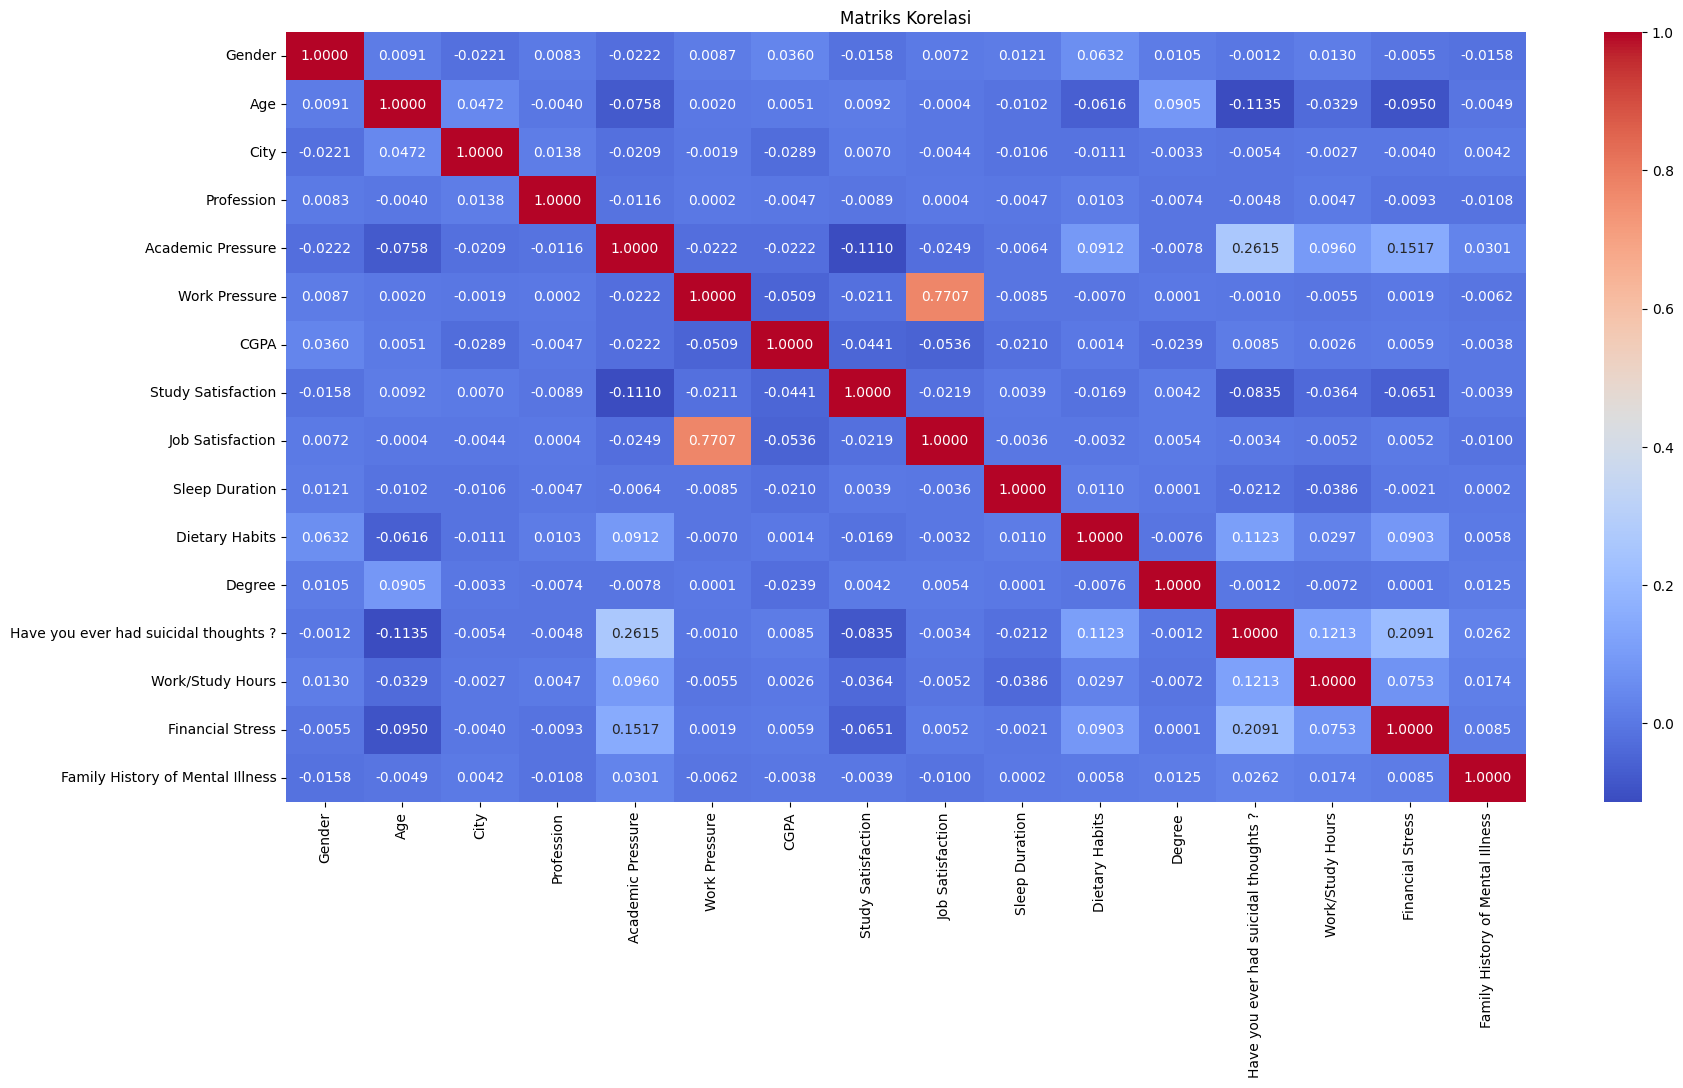

In [24]:
numerical_features = data.select_dtypes(include='number') # harus re-initiate numerical_features

correlation_matrix = numerical_features.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.4f', cmap='coolwarm', cbar=True)
plt.title('Matriks Korelasi')
plt.show()

In [25]:
correlation_matrix

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
Gender,1.000000,0.009071,-0.022073,0.008268,-0.022222,0.008715,0.036040,-0.015789,0.007172,0.012083,0.063207,0.010521,-0.001239,0.013008,-0.005491,-0.015759
Age,0.009071,1.000000,0.047156,-0.004010,-0.075803,0.002015,0.005056,0.009235,-0.000432,-0.010160,-0.061604,0.090509,-0.113502,-0.032928,-0.095020,-0.004861
City,-0.022073,0.047156,1.000000,0.013842,-0.020878,-0.001870,-0.028878,0.006997,-0.004422,-0.010593,-0.011110,-0.003330,-0.005369,-0.002682,-0.004037,0.004184
Profession,0.008268,-0.004010,0.013842,1.000000,-0.011636,0.000250,-0.004669,-0.008933,0.000392,-0.004700,0.010314,-0.007383,-0.004843,0.004688,-0.009267,-0.010815
Academic Pressure,-0.022222,-0.075803,-0.020878,-0.011636,1.000000,-0.022231,-0.022239,-0.110988,-0.024945,-0.006369,0.091247,-0.007817,0.261510,0.095970,0.151697,0.030069
Work Pressure,0.008715,0.002015,-0.001870,0.000250,-0.022231,1.000000,-0.050896,-0.021145,0.770652,-0.008535,-0.006959,0.000114,-0.001003,-0.005468,0.001883,-0.006207
CGPA,0.036040,0.005056,-0.028878,-0.004669,-0.022239,-0.050896,1.000000,-0.044062,-0.053631,-0.021035,0.001439,-0.023863,0.008512,0.002604,0.005885,-0.003752
Study Satisfaction,-0.015789,0.009235,0.006997,-0.008933,-0.110988,-0.021145,-0.044062,1.000000,-0.021907,0.003874,-0.016932,0.004181,-0.083490,-0.036441,-0.065102,-0.003880
Job Satisfaction,0.007172,-0.000432,-0.004422,0.000392,-0.024945,0.770652,-0.053631,-0.021907,1.000000,-0.003582,-0.003158,0.005423,-0.003389,-0.005222,0.005248,-0.010009
Sleep Duration,0.012083,-0.010160,-0.010593,-0.004700,-0.006369,-0.008535,-0.021035,0.003874,-0.003582,1.000000,0.010964,0.000118,-0.021230,-0.038619,-0.002109,0.000159


Ambil corr > 0.25 sebagai pertimbangan fitur fitur yang akan digunakan untuk model clustering.

In [26]:

strong_corr = correlation_matrix[(correlation_matrix.abs() > 0.25) & (correlation_matrix != 1)]

strong_corr = strong_corr.dropna(how='all').dropna(axis=1, how='all')

original_data = data # tujuannya utk retain all data and also features sblm kita rubah dengan isi dari strong_corr

data = data[strong_corr.columns]

strong_corr.columns


Index(['Academic Pressure', 'Work Pressure', 'Job Satisfaction',
       'Have you ever had suicidal thoughts ?'],
      dtype='object')

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Pakai K-Means Clustering dan k : 2, karena saya mau hasilnya sebagai biner.

In [27]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

KMeans(n_clusters=2)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Cek silhouette score

In [28]:
sil_score = silhouette_score(data, kmeans.labels_)
sil_score

0.7242655812372029

Hasil silhouette score adalah 0.724, melebihi minimal 0.55

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [29]:
# tidak diperlukan

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

Visualisasi dari cluster

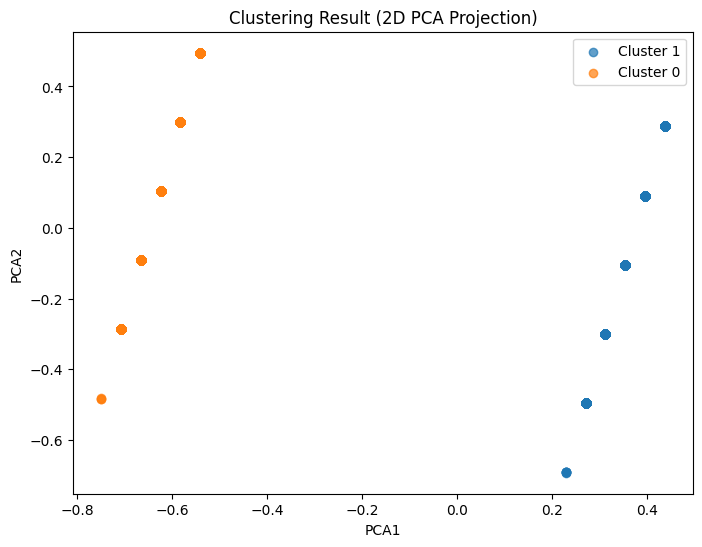

In [30]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
for cluster in pca_df['Cluster'].unique():
    cluster_points = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_points['PCA1'], cluster_points['PCA2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('Clustering Result (2D PCA Projection)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

Plot ini menunjukkan dengan jelas bagaimana pembagian dari cluster dengan menggunakan PCA 2 komponen, yang juga dapat didukung dengan silhouette 0.724, dan terpisah dengan jarak yang cukup baik.

Membuat variable baru untuk menampung dataset dan ditambah label dengan nama label dari source kaggle.

In [31]:
label = kmeans.labels_
data_with_label = original_data.copy()
data_with_label['Depression_Status'] = label

In [32]:
data_with_label

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression_Status
0,1.0,0.365854,1.000000,0.846154,1.0,0.0,0.897,0.4,0.0,0.00,0.000000,0.111111,1.0,0.250000,0.00,0.0,1
1,0.0,0.146341,0.058824,0.846154,0.4,0.0,0.590,1.0,0.0,0.00,0.333333,0.370370,0.0,0.250000,0.25,1.0,0
2,1.0,0.317073,0.862745,0.846154,0.6,0.0,0.703,1.0,0.0,0.50,0.000000,0.185185,0.0,0.750000,0.00,1.0,0
3,0.0,0.243902,0.960784,0.846154,0.6,0.0,0.559,0.4,0.0,0.25,0.333333,0.259259,1.0,0.333333,1.00,1.0,1
4,0.0,0.170732,0.313725,0.846154,0.8,0.0,0.813,0.6,0.0,0.00,0.333333,0.629630,1.0,0.083333,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.0,0.219512,0.882353,0.846154,1.0,0.0,0.575,1.0,0.0,0.00,1.000000,0.407407,1.0,0.583333,0.00,1.0,1
27897,1.0,0.219512,0.490196,0.846154,0.4,0.0,0.940,0.6,0.0,0.50,0.000000,0.925926,0.0,0.000000,0.50,1.0,0
27898,1.0,0.317073,0.176471,0.846154,0.6,0.0,0.661,0.8,0.0,0.00,1.000000,0.814815,0.0,1.000000,0.25,0.0,0
27899,0.0,0.000000,0.490196,0.846154,1.0,0.0,0.688,0.4,0.0,0.50,0.000000,0.407407,1.0,0.833333,1.00,0.0,1


In [33]:
original_data.columns[0:len(original_data.columns)]

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')

In [34]:
data_with_label.isnull().sum()

,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Sleep Duration,0


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Analisis karakteristik tiap cluster berdasarkan fitur

In [35]:
cluster_result = data_with_label.groupby('Depression_Status').mean()
cluster_result

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
Depression_Status,,,,,,,,,,,,,,,,
0,0.558028,0.208616,0.517835,0.845793,0.533392,0.000098,0.763967,0.618604,0.000220,0.385261,0.427688,0.404707,0.0,0.547210,0.436321,0.466764
1,0.556751,0.180443,0.514263,0.845605,0.683280,0.000079,0.766564,0.571454,0.000142,0.373556,0.523920,0.404043,1.0,0.624967,0.592207,0.493940


In [36]:
data_with_label['Depression_Status']

,Depression_Status
0,1
1,0
2,0
3,1
4,1
...,...
27896,1
27897,0
27898,0
27899,1


Pembagian hasil label 0 sebagai Not Depressed dan 1 sebagai Depressed

In [37]:
cluster_0 = data_with_label[data_with_label['Depression_Status'] == 0]
cluster_0['Depression_Status'].value_counts()

,count
Depression_Status,
0,10245


In [38]:
cluster_1 = data_with_label[data_with_label['Depression_Status'] == 1]
cluster_1['Depression_Status'].value_counts()

,count
Depression_Status,
1,17656


Tulis hasil interpretasinya di sini.
1. Cluster 0:

Gender : Valuenya 0.558 mendekati 1, dimana 1 adalah value untuk Male, menandakan didominasi oleh Male / pria.

Age : Rata-rata berada di umur 26-27 tahun, dengan menghitung dari rumus MinMaxScaler itu sendiri (MinAge + 0.2086 * (MaxAge - MinAge))

City : Rata-rata city dari cluster ini adalah Meerut dengan value 0.514

Profession : Rata-rata sudah pasti student karena data paling banyak diisi oleh student, didukung dengan 0.84, didominasi oleh student yang memiliki value 0.84 juga.

Academic Pressure : Tekanan dalam bidang akademis sebesar 0.68 yang merujuk pada value 3 dari skala 1 - 5.

Work Pressure : Tekanan dalam pekerjaan, dimana valuenya sangat mendekati 0 yang berarti tidak ada pressure dalam pekerjaan.

CPGA : Rata rata nilai siswa adalah 76.6, dihitung dari rumus MinMax, (0 + (0.766 * (10 - 0)))

Study Satisfaction : Tingkat kepuasan saat belajar untuk cluster ini, dengan value 0.5714, jika dihitung MinMax maka (1 + (0.5714 * (5 - 1))) maka rata-ratanya adalah 3.28

Job Satisfaction : Tingkat kepuasan saat bekerja untuk cluster ini mendekati 0, yang berarti tingkat kepuasannya rata-rata 0.

Sleep Duration : Durasi waktu tidur memiliki 0.374, dimana mendekati value 0.5 yang menandakan durasi tidur siswa rata-rata / condong kepada 'Less than 5 hours'.

Dietary Habits : Rutinitas makan siswa dengan value 0.52, yang menandakan rata-rata siswa pada cluster ini lebih condong kepada kebiasaan diet / makan dengan value 'Others'

Degree : Jenjang pendidikan siswa dengan value 0.404 merujuk bahwa cluster ini rata-rata berada dalam Class 12 / Kelas 12.

Have you ever had suicidal thoughts ? : Valuenya 1, berarti pada cluster tersebut, siswa pernah memikirkan tentang pemikiran meninggalkan dunia.

Work/Study Hours : Waktu belajar / bekerja dari orang-orang dalam cluster adalah 0.624, dimana angka tersebut ada di antara 0.667 dan 0.583, yang berarti rata-rata siswa pada cluster ini bisa masuk dalam 0 jam (0.583) atau 10 jam (0.667)

Financial Stress : Tekanan dalam finansial kehidupan siswa, dalam cluster ini memiliki value 0.592 yang mendekati value 0.534966 yang merupakan 3.13, didapatkan dari mean Financial Stress, yang pernah diisi saat ada empty values. Namun, karena hanya ada 3 baris yang berisikan 3.13, maka saya bisa asumsikan rata-rata pada cluster ini, Financial Stress siswa adalah 3 atau 3.13.

Family History of Mental Illness : Dengan value 0.493, pada cluster ini, rata-rata siswa mengarah ke value 0, yaitu tidak ada jejak penyakit mental dari keluarga.

2. Cluster 1:

Gender : Sama dengan cluster 0, valuenya kurang lebih 0.556, yang menandakan rata-rata adalah Male / pria.

Age : Dengan value 0.18, kita bisa mencari rata-rata umur dari cluster 1 adalah 25.38 tahun (25 - 26 tahun).

City : Sama dengan cluster 0 yang value nya mirip, yaitu Meerut.

Profession : Value di cluster 1 sama dengan cluster 0, maka rata-rata profession di cluster 1 sama dengan cluster 0, yaitu Student.

Academic Pressure : Dengan value 0.533, dihitung dari rumus MinMax, kita mendapatkan rata-rata 3.132

Work Pressure : Dalam cluster 1, tekanan pekerjaannya juga kurang lebih sama dengan cluster 0, sangat mendekati 0, menandakan tidak ada work pressure / tekanan dalam bekerja.

CGPA : Rata-rata nilai cluster 1 hampir sama dengan cluster 0, dengan rumus dari MinMax, maka 0 + (0.763 * (10 - 0)), sekitar 76.3

Study Satisfaction : Dengan value 0.618604, maka kita dapat hitung rata-rata study satisfaction cluster 1 adalah (1 + (0.618 * (5 - 1))), yaitu 3.4

Job Satisfaction : Dengan value sangat mendekati 0, maka sama seperti cluster 0, job satisfaction untuk cluster 1 adalah kurang lebih 0.

Sleep Duration : Durasi tidur untuk cluster 1, dengan value yang mirip dengan cluster 0, 0.385261, dan value tersebut juga dekat ke 0.5, maka durasi tidur siswa pada cluster 1 juga 'Less than 5 hours'.

Dietary Habits : Pada cluster 1, valuenya adalah 0.427688. Value ini lebih mendekati 0.333 yang merupakan representasi dari 'Moderate'.

Degree : Value 0.404707, mendekati dengan value 0.37 dibandingkan 0.444. Maka degree untuk cluster 1 berbeda dengan cluster 0, yaitu Bsc (Bachelor of Science).

Have you ever had suicidal thoughts ? : Pemikiran para cluster 1 berbanding terbalik dengan cluster 0, yaitu tidak pernah memikirkan tentang meninggalkan dunia.

Work/Study Hours : Value untuk cluster 1 dalam fitur ini adalah 0.547210, dimana mendekati dengan value 0.5833 yang melambangkan 7 jam (bisa juga dihitung dengan MinMax dan mendapat value yang sama).

Financial Stress : Tingkat stres dalam ranah finansial bagi cluster 1 adalah 0.547210, dimana mirip dengan cluster 0, rata-rata cluster 1 memiliki tingkat stres finansial 3.13

Family History of Mental Illness : Dengan value 0.466, para cluster 1 juga mengarah ke 0, yaitu tidak ada history penyakit mental dari keluarga.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [39]:
result_file = 'clustered_data.csv'
data_with_label.to_csv(result_file, index = False)